In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import cv2
import random
from google.colab import drive



# === STEP 2: Set paths ===
input_root = '/content/drive/MyDrive/video'  # Change if your folder is named differently
output_root = '/content/output'

# === STEP 3: Create output folder and subfolders ===
os.makedirs(output_root, exist_ok=True)

for shot_type in sorted(os.listdir(input_root)):
    shot_input_path = os.path.join(input_root, shot_type)
    shot_output_path = os.path.join(output_root, shot_type)
    if os.path.isdir(shot_input_path):
        os.makedirs(shot_output_path, exist_ok=True)

        # === STEP 4: Process each video ===
        for video_file in sorted(os.listdir(shot_input_path)):
            if not video_file.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
                continue

            video_path = os.path.join(shot_input_path, video_file)
            cap = cv2.VideoCapture(video_path)

            if not cap.isOpened():
                print(f"⚠️ Could not open {video_path}")
                continue

            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if frame_count <= 0:
                print(f"⚠️ No frames in {video_path}")
                cap.release()
                continue

            random_frame_idx = random.randint(0, frame_count - 1)
            cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_idx)
            ret, frame = cap.read()
            cap.release()

            if not ret:
                print(f"⚠️ Failed to read frame {random_frame_idx} from {video_file}")
                continue

            # Resize to 240x240
            frame_resized = cv2.resize(frame, (240, 240))

            # Save as .jpg with same name as video
            frame_name = os.path.splitext(video_file)[0] + ".jpg"
            output_path = os.path.join(shot_output_path, frame_name)
            cv2.imwrite(output_path, frame_resized)

            print(f"✅ Saved frame from {video_file} to {output_path}")

print("\n🎉 Done! Check the '/content/output' folder.")



🎉 Done! Check the '/content/output' folder.


In [4]:
import os
import cv2
import random
from google.colab import drive

# === Mount Google Drive ===
drive.mount('/content/drive')

# === Define paths ===
input_root = '/content/drive/MyDrive/video/VideoBadminton_Dataset'  # Your actual dataset path
output_root = '/content/output'

# === Create output folder ===
os.makedirs(output_root, exist_ok=True)

# === Loop through each category (e.g., Block, Smash, etc.)
for category in sorted(os.listdir(input_root)):
    category_path = os.path.join(input_root, category)

    if not os.path.isdir(category_path):
        print(f"⛔ Skipping non-folder: {category_path}")
        continue

    output_category_path = os.path.join(output_root, category)
    os.makedirs(output_category_path, exist_ok=True)

    video_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.mp4', '.avi', '.mov', '.mkv'))]

    print(f"🎬 Found {len(video_files)} videos in category: {category}")

    for video_file in video_files:
        video_path = os.path.join(category_path, video_file)
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"⚠️ Could not open {video_path}")
            continue

        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        if frame_count <= 0:
            print(f"⚠️ No frames in {video_path}")
            cap.release()
            continue

        random_frame_idx = random.randint(0, frame_count - 1)
        cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_idx)
        ret, frame = cap.read()
        cap.release()

        if not ret:
            print(f"⚠️ Failed to read frame {random_frame_idx} from {video_file}")
            continue

        # Resize frame
        frame_resized = cv2.resize(frame, (240, 240))
        output_path = os.path.join(output_category_path, os.path.splitext(video_file)[0] + ".jpg")
        cv2.imwrite(output_path, frame_resized)

        print(f"✅ Saved: {output_path}")


Streaming output truncated to the last 5000 lines.
✅ Saved: /content/output/Drop Shot/2022-08-30_18-00-09_dataset_set1_036_002811_002839_B_05.jpg
✅ Saved: /content/output/Drop Shot/2022-09-07_18-07-54_dataset_set1_054_006008_006038_A_05.jpg
✅ Saved: /content/output/Drop Shot/2022-08-30_19-10-16_dataset_set1_052_004126_004163_A_05.jpg
✅ Saved: /content/output/Drop Shot/2022-09-01_19-14-18_dataset_set1_052_004786_004812_B_05.jpg
✅ Saved: /content/output/Drop Shot/2022-08-31_19-48-28_dataset_set1_068_006207_006240_B_05.jpg
✅ Saved: /content/output/Drop Shot/2022-09-07_19-02-20_dataset_set1_038_002997_003037_A_05.jpg
✅ Saved: /content/output/Drop Shot/2022-09-01_19-26-18_dataset_set1_083_005915_005947_A_05.jpg
✅ Saved: /content/output/Drop Shot/2022-08-30_18-27-08_dataset_set1_226_016902_016932_B_05.jpg
✅ Saved: /content/output/Drop Shot/2022-08-30_18-27-08_dataset_set1_095_007592_007625_A_05.jpg
✅ Saved: /content/output/Drop Shot/2022-08-31_19-37-41_dataset_set1_050_004317_004347_B_05.jpg

In [5]:
import os
import pandas as pd

# Set path to the folder where your 18 shot-type subfolders exist
output_root = '/content/output'  # ← change this if needed

# Step 1: List all 18 shot type folders
shot_types = sorted([folder for folder in os.listdir(output_root)
                     if os.path.isdir(os.path.join(output_root, folder))])

print("📂 Detected shot types:", shot_types)

# Step 2: Initialize list to hold rows
data_rows = []

# Step 3: Loop through each shot type folder
for shot in shot_types:
    shot_folder = os.path.join(output_root, shot)
    for img_file in os.listdir(shot_folder):
        if img_file.lower().endswith('.jpg'):
            # Create one-hot encoding row
            row = {'filename': img_file}
            for s in shot_types:
                row[s] = 1 if s == shot else 0
            data_rows.append(row)

# Step 4: Convert to DataFrame
df = pd.DataFrame(data_rows)

# Optional: Reorder columns: filename first, then shot types
df = df[['filename'] + shot_types]

# Step 5: Save to CSV
csv_output_path = '/content/shot_labels.csv'
df.to_csv(csv_output_path, index=False)

print(f"✅ CSV saved at: {csv_output_path}")
df.head()


📂 Detected shot types: ['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice', 'VideoBadminton_Dataset']
✅ CSV saved at: /content/shot_labels.csv


,filename,Block,Clear,Cross Court Flight,Cut,Defensive Clear,Defensive Drive,Drop Shot,Flat Shot,Lift,Long Serve,Push Shot,Rear Court Flat Drive,Rush Shot,Short Flat Shot,Short Serve,Smash,Tap Smash,Transitional Slice,VideoBadminton_Dataset
0,2022-08-30_19-10-16_dataset_set1_133_011125_01...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-08-30_18-59-37_dataset_set1_154_016013_01...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2022-08-31_19-09-07_dataset_set1_101_009368_00...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2022-08-30_18-59-37_dataset_set1_095_009833_00...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2022-09-06_18-09-11_dataset_set1_145_010795_01...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from google.colab import files

uploaded = files.upload()


Saving shot_labels.csv to shot_labels (1).csv


In [7]:
# Import necessary libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
# Modify the dataset class to return a single label
class BadmintonDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = pd.read_csv('shot_labels.csv')
        self.img_dir = img_dir
        self.transform = transform

        print("Columns in the CSV file:")
        print(self.annotations.columns)

        # Identify shot type columns (excluding 'filename')
        self.classes = [col for col in self.annotations.columns if col != 'filename']

        print("\nIdentified shot type columns:")
        print(self.classes)

        # Print sample data
        print("\nSample data (first 5 rows):")
        print(self.annotations.head())

        # Print data types of columns
        print("\nData types of columns:")
        print(self.annotations.dtypes)

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_name = self.annotations.iloc[index, 0]  # 'filename' column
        img_path = os.path.join(self.img_dir, img_name)

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

        image = Image.open(img_path).convert("RGB")

        # Get the index of the correct class (1 in the one-hot encoding)
        label = torch.tensor(self.annotations.iloc[index][self.classes].values.astype(np.float32))
        label = torch.argmax(label).item()

        if self.transform:
            image = self.transform(image)

        return (image, label)

Columns in the CSV file:
Index(['filename', 'Block', 'Clear', 'Cross Court Flight', 'Cut',
       'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift',
       'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot',
       'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash',
       'Transitional Slice', 'VideoBadminton_Dataset'],
      dtype='object')

Identified shot type columns:
['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice', 'VideoBadminton_Dataset']

Sample data (first 5 rows):
                                            filename  Block  Clear  \
0  2022-08-30_19-10-16_dataset_set1_133_011125_01...      1      0   
1  2022-08-30_18-59-37_dataset_set1_154_016013_01...      1      0   
2  2022-08-31_19-09-07_dataset_set1_101_009368_00...      

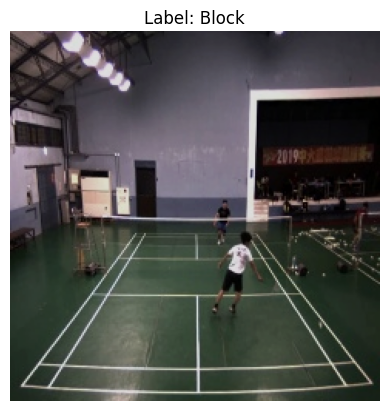

First image displayed.


In [9]:
# # Data Transforms: Reduce dimensions
# data_transforms = transforms.Compose([
#     transforms.Resize((240, 240)),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Load Data
# dataset = BadmintonDataset(csv_file='filtered_classes.csv', img_dir='images', transform=data_transforms)

# # Function to display the first image with its labels
# def display_first_image(dataset):
#     image, label = dataset[0]
#     image = image.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C)
#     image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
#     image = image.clip(0, 1)  # Clip values to [0, 1] range

#     plt.imshow(image)
#     title = f"Label: {dataset.classes[label]}"
#     plt.title(title)
#     plt.axis('off')
#     plt.show()

# # Display the first image
# display_first_image(dataset)
# print("First image displayed.")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Modified BadmintonDataset class to handle subfolder structure
class BadmintonDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

        print("Columns in the CSV file:")
        print(self.annotations.columns)

        # Identify shot type columns (excluding 'filename')
        self.classes = [col for col in self.annotations.columns if col != 'filename']

        print("\nIdentified shot type columns:")
        print(self.classes)

        # Print sample data
        print("\nSample data (first 5 rows):")
        print(self.annotations.head())

        # Print data types of columns
        print("\nData types of columns:")
        print(self.annotations.dtypes)

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_name = self.annotations.iloc[index, 0]  # 'filename' column

        # Determine the shot type (class) for this image
        label_vector = self.annotations.iloc[index][self.classes].values
        label_idx = np.argmax(label_vector)
        shot_type = self.classes[label_idx]

        # Construct image path: /content/output/<shot_type>/<filename>
        img_path = os.path.join(self.img_dir, shot_type, img_name)

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

        image = Image.open(img_path).convert("RGB")

        # Get the index of the correct class (1 in the one-hot encoding)
        label = torch.tensor(label_vector.astype(np.float32))
        label = torch.argmax(label).item()

        if self.transform:
            image = self.transform(image)

        return (image, label)

# Data Transforms
data_transforms = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Data
dataset = BadmintonDataset(
    csv_file='shot_labels.csv',
    img_dir='/content/output',
    transform=data_transforms
)

# Function to display the first image with its label
def display_first_image(dataset):
    image, label = dataset[0]
    image = image.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C)
    image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
    image = image.clip(0, 1)  # Clip values to [0, 1] range

    plt.imshow(image)
    title = f"Label: {dataset.classes[label]}"
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display CSV data (already printed in dataset initialization) and the first image
print("\nDisplaying the first image...")
display_first_image(dataset)
print("First image displayed.")

In [10]:
# Split the dataset
train_size = int(0.86 * len(dataset))
val_size = int(0.09 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True) # initial batch size 32, changed to 16
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [12]:
class BadmintonCNN(nn.Module):
    def __init__(self, num_classes):
        super(BadmintonCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(256, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, num_classes)
            # No activation function here; we'll use CrossEntropyLoss which includes LogSoftmax
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [13]:
# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Training Loss: {running_loss/len(train_loader):.4f}, "
              f"Validation Loss: {val_loss/len(val_loader):.4f}, "
              f"Validation Accuracy: {val_accuracy:.2f}%")

In [14]:
# Main execution
#num_classes = len(dataset.classes)
#model = BadmintonCNN(num_classes).to(device)
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.001)

#train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device)

num_classes = len(dataset.classes)
model = BadmintonCNN(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [15]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
])

# Dataset and DataLoader
dataset = BadmintonDataset(csv_file='/content/shot_labels.csv',
                           img_dir='/content/output',
                           transform=transform)

# Optional: Split dataset into train and val
from torch.utils.data import random_split

val_size = int(0.2 * len(dataset))  # 20% validation
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)


Columns in the CSV file:
Index(['filename', 'Block', 'Clear', 'Cross Court Flight', 'Cut',
       'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift',
       'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot',
       'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash',
       'Transitional Slice', 'VideoBadminton_Dataset'],
      dtype='object')

Identified shot type columns:
['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice', 'VideoBadminton_Dataset']

Sample data (first 5 rows):
                                            filename  Block  Clear  \
0  2022-08-30_19-10-16_dataset_set1_133_011125_01...      1      0   
1  2022-08-30_18-59-37_dataset_set1_154_016013_01...      1      0   
2  2022-08-31_19-09-07_dataset_set1_101_009368_00...      

In [16]:
class BadmintonCNN(nn.Module):
    def __init__(self, num_classes):
        super(BadmintonCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 30 * 30, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = len(dataset.classes)
model = BadmintonCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function with early stopping and checkpointing
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    best_val_loss = float('inf')
    patience = 5
    wait = 0
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_loss /= len(val_loader)
        val_acc = 100 * correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

        # Early stopping and checkpointing
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stopping triggered.")
                break

    return train_losses, val_losses, val_accuracies

train_losses, val_losses, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, device=device)


Epoch [1/50], Training Loss: 2.5620, Validation Loss: 2.4130, Validation Accuracy: 14.96%
Epoch [2/50], Training Loss: 2.4258, Validation Loss: 2.3636, Validation Accuracy: 16.62%
Epoch [3/50], Training Loss: 2.3868, Validation Loss: 2.3473, Validation Accuracy: 17.65%
Epoch [4/50], Training Loss: 2.3173, Validation Loss: 2.1278, Validation Accuracy: 28.52%
Epoch [5/50], Training Loss: 2.0802, Validation Loss: 1.9557, Validation Accuracy: 36.00%
Epoch [6/50], Training Loss: 1.8809, Validation Loss: 1.7892, Validation Accuracy: 41.18%
Epoch [7/50], Training Loss: 1.7143, Validation Loss: 1.6810, Validation Accuracy: 44.18%
Epoch [8/50], Training Loss: 1.5639, Validation Loss: 1.6344, Validation Accuracy: 48.34%
Epoch [9/50], Training Loss: 1.4072, Validation Loss: 1.5800, Validation Accuracy: 48.15%
Epoch [10/50], Training Loss: 1.2574, Validation Loss: 1.5907, Validation Accuracy: 48.27%
Epoch [11/50], Training Loss: 1.0935, Validation Loss: 1.6221, Validation Accuracy: 49.42%
Epoch [1

train part 2

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = len(dataset.classes)
model = BadmintonCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # or use SGD with momentum
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, device):
    best_val_loss = float('inf')
    patience = 3
    wait = 0
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_loss /= len(val_loader)
        val_acc = 100 * correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

        scheduler.step(val_loss)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict()
            }, 'best_model.pth')
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stopping triggered.")
                break

    return train_losses, val_losses, val_accuracies

# Assuming batch size = 8 as instructed
train_losses, val_losses, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50, device=device)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50], Training Loss: 2.5834, Validation Loss: 2.4659, Validation Accuracy: 13.43%
Epoch [2/50], Training Loss: 2.4478, Validation Loss: 2.4099, Validation Accuracy: 16.62%
Epoch [3/50], Training Loss: 2.4170, Validation Loss: 2.3868, Validation Accuracy: 14.51%
Epoch [4/50], Training Loss: 2.3956, Validation Loss: 2.3504, Validation Accuracy: 16.56%
Epoch [5/50], Training Loss: 2.3788, Validation Loss: 2.3398, Validation Accuracy: 17.46%
Epoch [6/50], Training Loss: 2.3583, Validation Loss: 2.3410, Validation Accuracy: 18.67%
Epoch [7/50], Training Loss: 2.3380, Validation Loss: 2.2641, Validation Accuracy: 23.21%
Epoch [8/50], Training Loss: 2.2642, Validation Loss: 2.1833, Validation Accuracy: 26.02%
Epoch [9/50], Training Loss: 2.1492, Validation Loss: 1.9881, Validation Accuracy: 33.95%
Epoch [10/50], Training Loss: 2.0166, Validation Loss: 1.9623, Validation Accuracy: 34.02%
Epoch [11/50], Training Loss: 1.9005, Validation Loss: 1.7976, Validation Accuracy: 41.88%
Epoch [1

In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


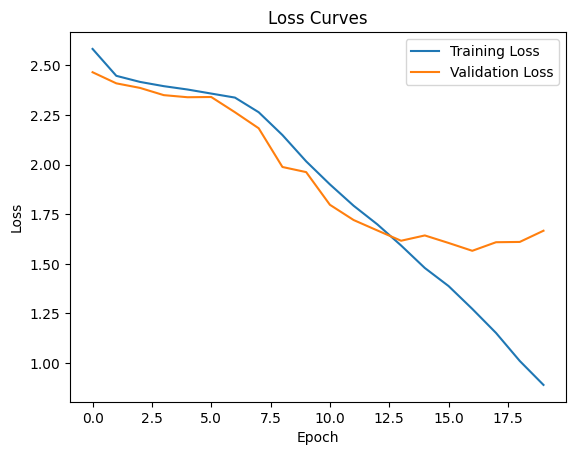

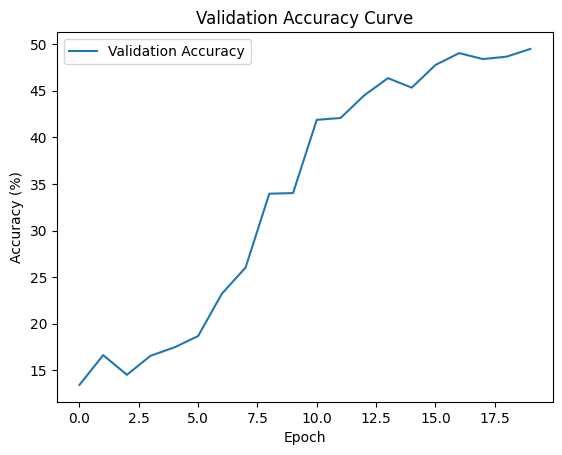

In [41]:
# Plot losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


In [42]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

def compute_metrics(y_true, y_pred, classes):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes, zero_division=1))

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def display_sample_predictions(model, test_loader, device, classes, num_samples=5):
    model.eval()
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4 * num_samples))
    count = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for j in range(images.size(0)):
                if count >= num_samples:
                    break
                img = images[j].cpu().permute(1, 2, 0)
                img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
                img = img.clip(0, 1)
                axes[count, 0].imshow(img)
                axes[count, 0].set_title(f"True: {classes[labels[j]]}")
                axes[count, 0].axis('off')

                axes[count, 1].imshow(img)
                axes[count, 1].set_title(f"Pred: {classes[preds[j]]}")
                axes[count, 1].axis('off')

                count += 1
            if count >= num_samples:
                break
    plt.tight_layout()
    plt.show()


In [43]:
# Load best model before evaluation
checkpoint = torch.load('best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

# Run evaluation
y_pred, y_true = evaluate_model(model, test_loader, device)
compute_metrics(y_true, y_pred, dataset.classes)
plot_confusion_matrix(y_true, y_pred, dataset.classes)
display_sample_predictions(model, test_loader, device, dataset.classes)


Accuracy: 0.5740
Precision: 0.6458
Recall: 0.5740
F1 Score: 0.5526

Classification Report:


ValueError: Number of classes, 18, does not match size of target_names, 19. Try specifying the labels parameter

old part


In [24]:
# num_classes = len(dataset.classes)
# model = BadmintonCNN(num_classes).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, device=device)


Epoch [1/50], Training Loss: 2.5509, Validation Loss: 2.3655, Validation Accuracy: 16.94%
Epoch [2/50], Training Loss: 2.3747, Validation Loss: 2.2437, Validation Accuracy: 22.25%
Epoch [3/50], Training Loss: 2.1667, Validation Loss: 1.9905, Validation Accuracy: 34.65%
Epoch [4/50], Training Loss: 1.9771, Validation Loss: 1.8802, Validation Accuracy: 36.19%
Epoch [5/50], Training Loss: 1.8296, Validation Loss: 1.7872, Validation Accuracy: 41.69%
Epoch [6/50], Training Loss: 1.7115, Validation Loss: 1.7076, Validation Accuracy: 43.09%
Epoch [7/50], Training Loss: 1.5995, Validation Loss: 1.6529, Validation Accuracy: 44.50%
Epoch [8/50], Training Loss: 1.4867, Validation Loss: 1.6421, Validation Accuracy: 43.80%
Epoch [9/50], Training Loss: 1.3818, Validation Loss: 1.6103, Validation Accuracy: 46.55%
Epoch [10/50], Training Loss: 1.2696, Validation Loss: 1.5830, Validation Accuracy: 47.63%
Epoch [11/50], Training Loss: 1.1502, Validation Loss: 1.6348, Validation Accuracy: 46.10%
Epoch [1

In [25]:
# # move this up to the top after epochs are done
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

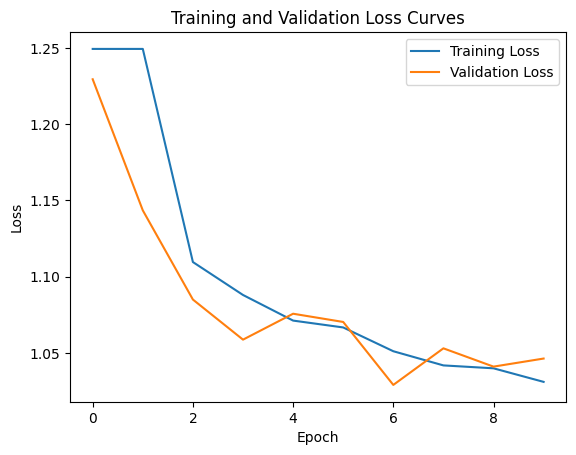

In [26]:
# # Plot the losses after training
# train_losses = [1.2494, 1.2494, 1.1096, 1.0880, 1.0712, 1.0667, 1.0511, 1.0418, 1.0399, 1.0310]
# val_losses = [1.2295, 1.1435, 1.0850, 1.0587, 1.0757, 1.0703, 1.0290, 1.0530, 1.0410, 1.0463]


# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss Curves')
# plt.legend()
# plt.show()

In [20]:
# def evaluate_model(model, test_loader, device):
#     model.eval()
#     all_preds = []
#     all_labels = []

#     with torch.no_grad():
#         for images, labels in test_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, preds = torch.max(outputs, 1)
#             all_preds.extend(preds.cpu().numpy())
#             all_labels.extend(labels.cpu().numpy())

#     return np.array(all_preds), np.array(all_labels)

# def compute_metrics(y_true, y_pred, classes):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
#     recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
#     f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")

#     print("\nClassification Report:")
#     print(classification_report(y_true, y_pred, target_names=classes, zero_division=1))

# def plot_confusion_matrix(y_true, y_pred, classes):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.show()

# def display_sample_predictions(model, test_loader, device, classes, num_samples=5):
#     model.eval()
#     fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))

#     with torch.no_grad():
#         for i, (images, labels) in enumerate(test_loader):
#             if i >= num_samples:
#                 break

#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, preds = torch.max(outputs, 1)

#             for j in range(2):
#                 img = images[j].cpu().permute(1, 2, 0)
#                 img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
#                 img = img.clip(0, 1)

#                 axes[i, j].imshow(img)
#                 axes[i, j].set_title(f"True: {classes[labels[j]]}\nPred: {classes[preds[j]]}")
#                 axes[i, j].axis('off')

#     plt.tight_layout()
#     plt.show()

Accuracy: 0.25510204081632654
Precision: 0.5071471505853393
Recall: 0.25510204081632654
F1 Score: 0.19315295414461522

Classification Report:
                       precision    recall  f1-score   support

                Block       0.33      0.08      0.12        13
                Clear       0.15      0.79      0.25        43
   Cross Court Flight       0.00      0.00      0.00         7
                  Cut       0.00      0.00      0.00        29
      Defensive Clear       0.00      0.00      0.00         8
      Defensive Drive       1.00      0.43      0.60         7
            Drop Shot       1.00      0.03      0.05        37
            Flat Shot       0.00      0.00      0.00        21
                 Lift       0.32      0.30      0.31        33
           Long Serve       0.33      0.68      0.45        53
            Push Shot       0.00      0.00      0.00        15
Rear Court Flat Drive       0.80      0.36      0.50        11
            Rush Shot       1.00      

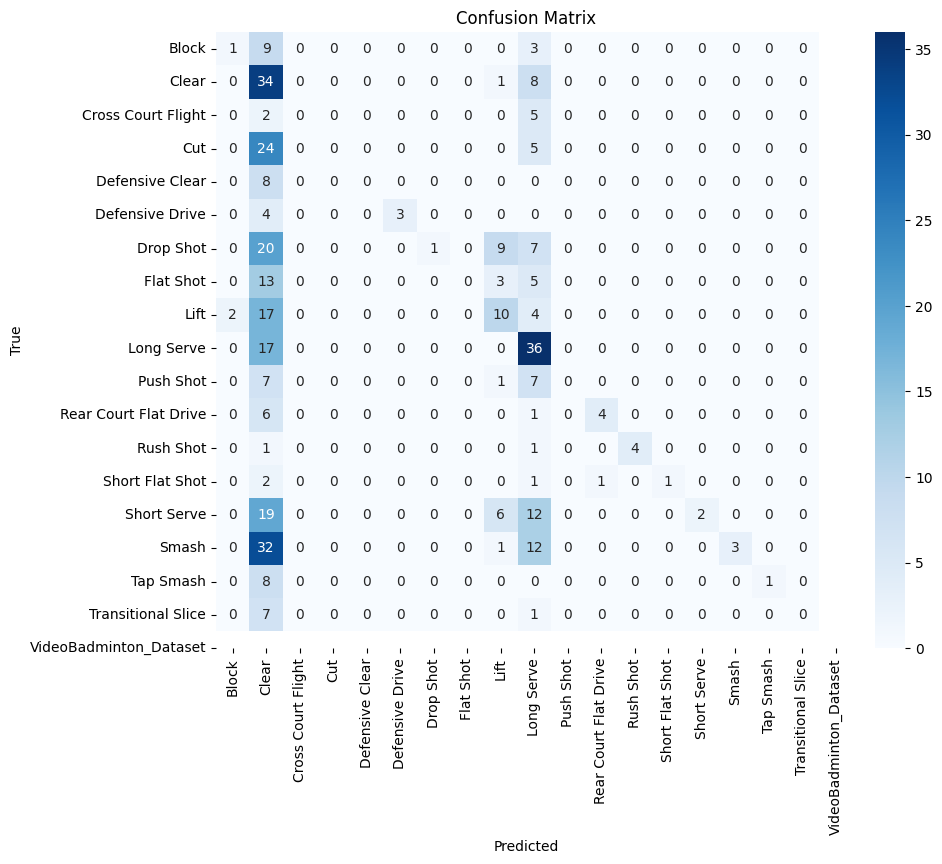

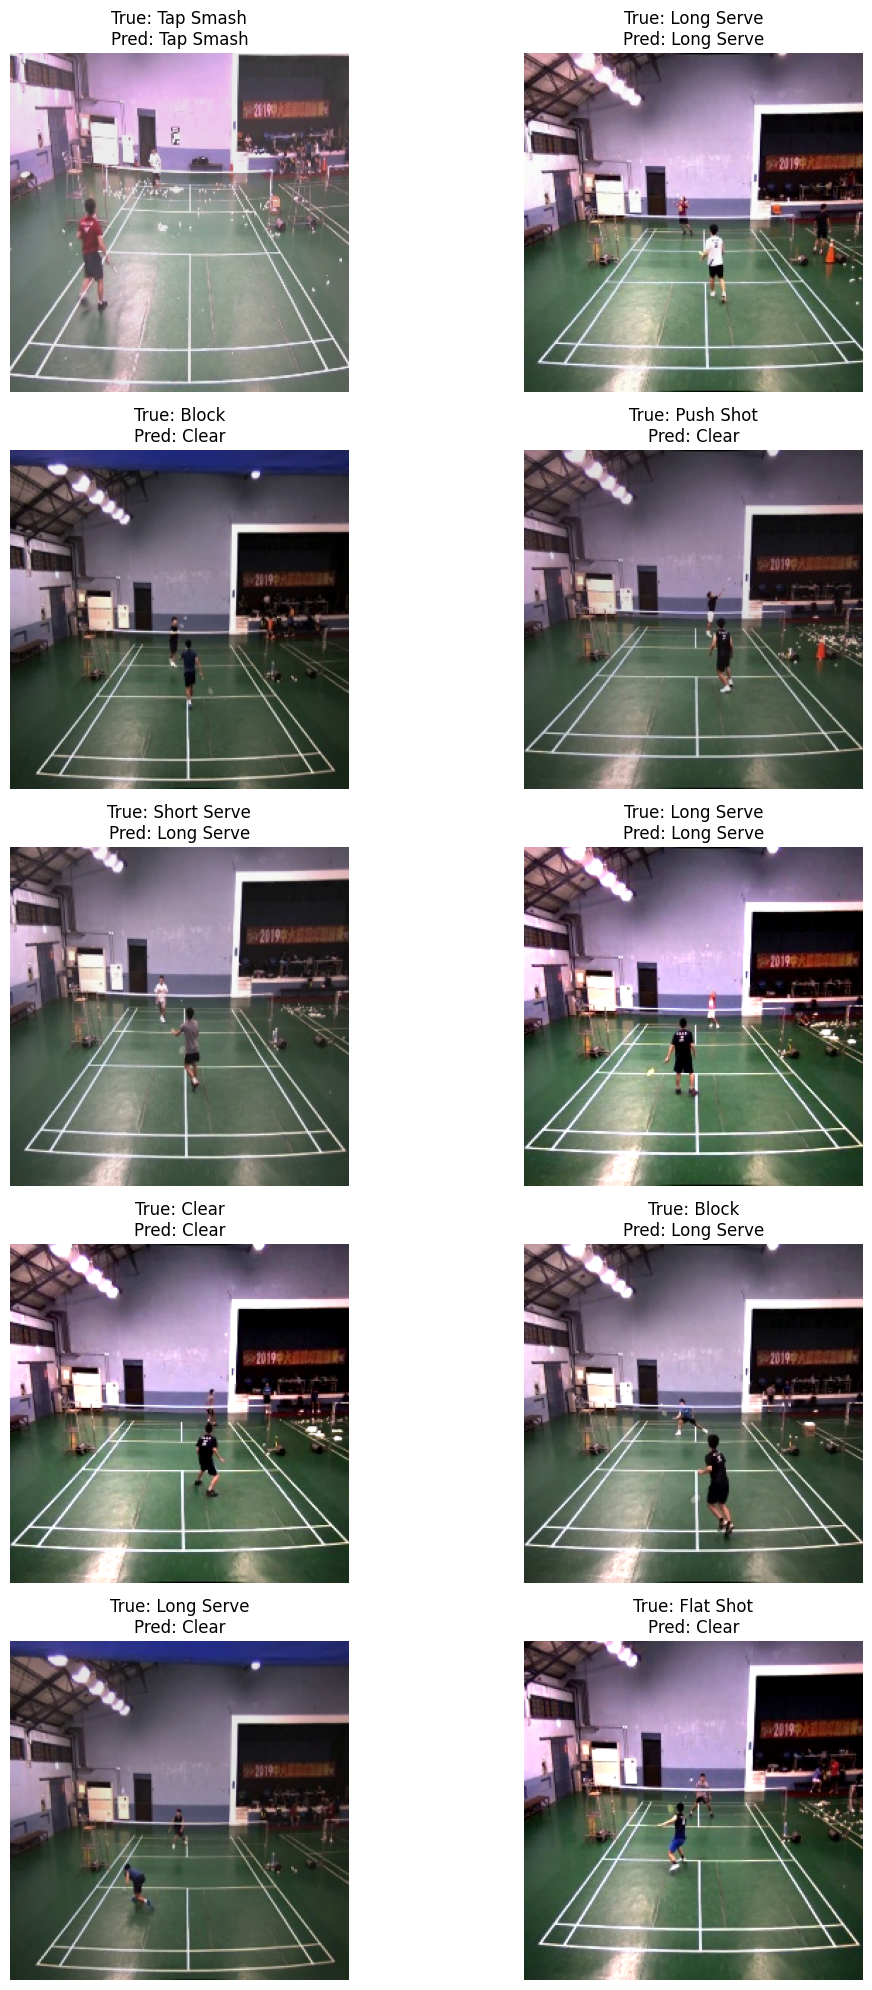

In [29]:
# # Evaluation
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)
# model.eval()

# y_pred, y_true = evaluate_model(model, test_loader, device)

# # Compute and display metrics
# compute_metrics(y_true, y_pred, dataset.classes)

# # Plot confusion matrix
# plot_confusion_matrix(y_true, y_pred, dataset.classes)

# # Display sample predictions
# display_sample_predictions(model, test_loader, device, dataset.classes)

In [28]:
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# def compute_metrics(y_true, y_pred, class_names):
#     # Remove the unwanted class if it exists
#     if "VideoBadminton_Dataset" in class_names:
#         class_names = [cls for cls in class_names if cls != "VideoBadminton_Dataset"]

#     print("Accuracy:", accuracy_score(y_true, y_pred))
#     print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
#     print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
#     print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))

#     print("\nClassification Report:")
#     print(classification_report(
#         y_true,
#         y_pred,
#         labels=range(len(class_names)),
#         target_names=class_names,
#         zero_division=0
#     ))
